<a href="https://colab.research.google.com/github/FrancescoZanella/Neural_Networks_Time_series_classification/blob/main/FinalHW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%cd /gdrive/My Drive/homework2

/gdrive/My Drive/homework2


In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
import logging

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.9.2


In [ ]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [ ]:
!unzip /gdrive/MyDrive/homework2/training_dataset_homework2.zip

In [ ]:
X_train = np.load('x_train.npy');
Y_train = np.load('y_train.npy')
X_train.shape, Y_train.shape

((2429, 36, 6), (2429,))

#Train, validation split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=seed, stratify = Y_train)
#splitting training data and validation data, validation size 10% of whole data, everytime the same split.
print(X_train.shape, X_val.shape)

(2186, 36, 6) (243, 36, 6)


#Mean, standard deviation

In [ ]:
# Compute mean and standard deviation of every sample
mean = np.ones(X_train.shape[0])
std = np.ones(X_train.shape[0])
for i in range(X_train.shape[0]):
  mean[i] = np.mean(X_train[i,:,:])
  std[i] = np.std(X_train[i,:,:])

#Data augmentation

In [ ]:
import copy

X_train_gpt1 = copy.copy(X_train)
X_train_gpt2 = copy.copy(X_train)
# Loop over all samples
for i in range(X_train.shape[0]):

  # Shift the data by a random amount
  shift = np.random.randint(-1.5, 1.5)
  X_train_gpt1[i,:,:] = np.roll(X_train_gpt1[i,:,:], shift, axis=0)

  # Scale the data by a random factor
  scale = np.random.uniform(0.3, 2)
  X_train_gpt2[i,:,:] = X_train_gpt2[i,:,:] * scale

# Save in X_train_copy a copy of X_train to which we add a scaled normale noise
# Then we repeat this procedure
X_train_copy = copy.copy(X_train)
for i in range(X_train.shape[0]):
  for j in range(X_train.shape[2]):
    X_train_copy[i,:,j] = X_train_copy[i,:,j] + 0.25*np.random.normal(0,std[i],36)

X_train_copy1 = copy.copy(X_train)
for i in range(X_train.shape[0]):
  for j in range(X_train.shape[2]):
    X_train_copy1[i,:,j] = X_train_copy1[i,:,j] + 0.25*np.random.normal(0,std[i],36)

X_train_copy2 = copy.copy(X_train)
for i in range(X_train.shape[0]):
  for j in range(X_train.shape[2]):
    X_train_copy2[i,:,j] = X_train_copy2[i,:,j] + 0.25*np.random.normal(0,std[i],36)

X_train_copy3 = copy.copy(X_train)
for i in range(X_train.shape[0]):
  for j in range(X_train.shape[2]):
    X_train_copy3[i,:,j] = X_train_copy3[i,:,j] + 0.25*np.random.normal(0,std[i],36)

X_train_copy4 = copy.copy(X_train)
for i in range(X_train.shape[0]):
  for j in range(X_train.shape[2]):
    X_train_copy4[i,:,j] = X_train_copy4[i,:,j] + 0.25*np.random.normal(0,std[i],36)

X_train_copy5 = copy.copy(X_train)
for i in range(X_train.shape[0]):
  for j in range(X_train.shape[2]):
    X_train_copy5[i,:,j] = X_train_copy5[i,:,j] + 0.25*np.random.normal(0,std[i],36)

# Concatenate all the obtained vectors
X_train = np.concatenate((X_train,X_train_copy), axis = 0)
X_train = np.concatenate((X_train,X_train_copy1), axis = 0)
X_train = np.concatenate((X_train,X_train_copy2), axis = 0)
X_train = np.concatenate((X_train,X_train_copy3), axis = 0)
X_train = np.concatenate((X_train,X_train_copy4), axis = 0)
X_train = np.concatenate((X_train,X_train_copy5), axis = 0)

X_train = np.concatenate((X_train,X_train_gpt1), axis = 0)
X_train = np.concatenate((X_train,X_train_gpt2), axis = 0)

# Print the shape of the new vector X_train
print(X_train.shape)


# Now we copy and concatenate the vector with labels
Y_train_copy = copy.copy(Y_train)
Y_train_copy1 = copy.copy(Y_train)
Y_train_copy2 = copy.copy(Y_train)
Y_train_copy3 = copy.copy(Y_train)
Y_train_copy4 = copy.copy(Y_train)
Y_train_copy5 = copy.copy(Y_train)

Y_train_gpt1 = copy.copy(Y_train)
Y_train_gpt2 = copy.copy(Y_train)


Y_train = np.concatenate((Y_train,Y_train_copy))
Y_train = np.concatenate((Y_train,Y_train_copy1))
Y_train = np.concatenate((Y_train,Y_train_copy2))
Y_train = np.concatenate((Y_train,Y_train_copy3))
Y_train = np.concatenate((Y_train,Y_train_copy4))
Y_train = np.concatenate((Y_train,Y_train_copy5))

Y_train = np.concatenate((Y_train,Y_train_gpt1))
Y_train = np.concatenate((Y_train,Y_train_gpt2))

# Print the shape of the new vector Y_train
print(Y_train.shape)

(19674, 36, 6)
(19674,)


In [ ]:
# Layer to add for data augmentation
height = tf.keras.layers.RandomHeight(0.3)
width = tf.keras.layers.RandomWidth(0.3)
zoom = tf.keras.layers.RandomZoom(0.3)
flip = tf.keras.layers.RandomFlip()

#Standardization

In [ ]:
mean = (np.sum(mean))/(2186)
std = (np.sum(std))/(2186)
print(mean,std)
for i in range(X_train.shape[0]):
  X_train[i,:,:] = (X_train[i,:,:]-mean)/std
for i in range(X_val.shape[0]):
  X_val[i,:,:] = (X_val[i,:,:]-mean)/std

21.720358984340585 147.340310784677


#Convert labels

In [ ]:
# Convert the sparse labels to categorical values
Y_train = tfk.utils.to_categorical(Y_train)
Y_val = tfk.utils.to_categorical(Y_val)
X_train.shape, Y_train.shape

((19674, 36, 6), (19674, 12))

In [ ]:
input_shape = X_train.shape[1:]
classes = Y_train.shape[-1]
batch_size = 128
epochs = 200
X_train.shape[1:]

(36, 6)

#Build and train the model

In [ ]:
def build_1DCNN_classifier(input_shape, classes):
    # Build the neural network layer by layer
    height,
    width,
    zoom,
    flip,
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    # Feature extractor
    cnn = tfkl.Conv1D(128,3,padding='same',activation='relu')(input_layer)
    cnn = tfkl.MaxPooling1D()(cnn)
    #dropout = tfkl.Dropout(.5, seed=seed)(cnn)
    cnn = tfkl.Conv1D(128,3,padding='same',activation='relu')(cnn)
    gap = tfkl.GlobalAveragePooling1D()(cnn)
    dropout = tfkl.Dropout(.5, seed=seed)(gap)

    # Classifier
    classifier = tfkl.Dense(128, activation='relu')(dropout)
    output_layer = tfkl.Dense(classes, activation='softmax')(classifier)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

    # Return the model
    return model

In [ ]:
model = build_1DCNN_classifier(input_shape, classes)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 36, 6)]           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 36, 128)           2432      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 18, 128)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 18, 128)           49280     
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 128)               0     

In [ ]:
# Train the model
history = model.fit(
    x = X_train,
    y = Y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (X_val,Y_val),
    callbacks = [
        tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True),
        tfk.callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode='max', patience=5, factor=0.5, min_lr=1e-5)
    ]
).history

Epoch 1/200
154/154 [==============================] - 4s 21ms/step - loss: 2.0185 - accuracy: 0.3584 - val_loss: 1.7077 - val_accuracy: 0.4403 - lr: 0.0010
Epoch 2/200
154/154 [==============================] - 3s 20ms/step - loss: 1.6860 - accuracy: 0.4335 - val_loss: 1.4813 - val_accuracy: 0.4979 - lr: 0.0010
Epoch 3/200
154/154 [==============================] - 3s 20ms/step - loss: 1.4775 - accuracy: 0.4959 - val_loss: 1.3299 - val_accuracy: 0.5514 - lr: 0.0010
Epoch 4/200
154/154 [==============================] - 3s 20ms/step - loss: 1.3470 - accuracy: 0.5401 - val_loss: 1.2689 - val_accuracy: 0.6173 - lr: 0.0010
Epoch 5/200
154/154 [==============================] - 3s 20ms/step - loss: 1.2382 - accuracy: 0.5856 - val_loss: 1.2141 - val_accuracy: 0.6296 - lr: 0.0010
Epoch 6/200
154/154 [==============================] - 3s 20ms/step - loss: 1.1901 - accuracy: 0.6052 - val_loss: 1.2129 - val_accuracy: 0.6502 - lr: 0.0010
Epoch 7/200
154/154 [==============================] - 3s 

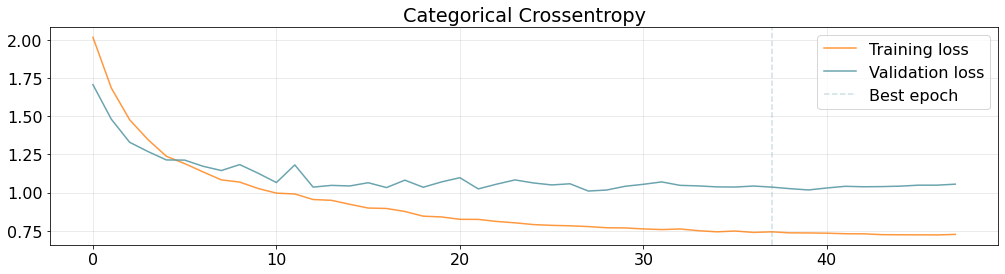

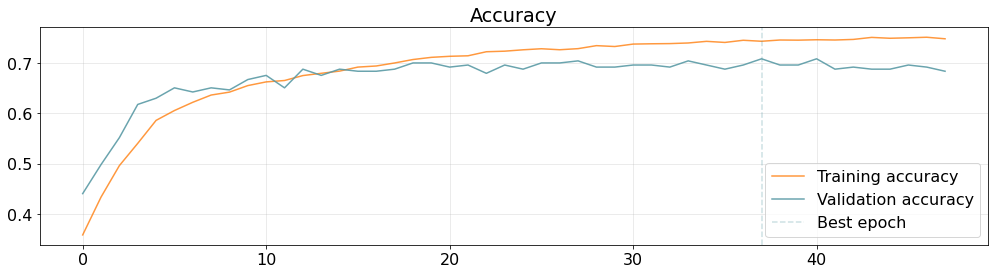

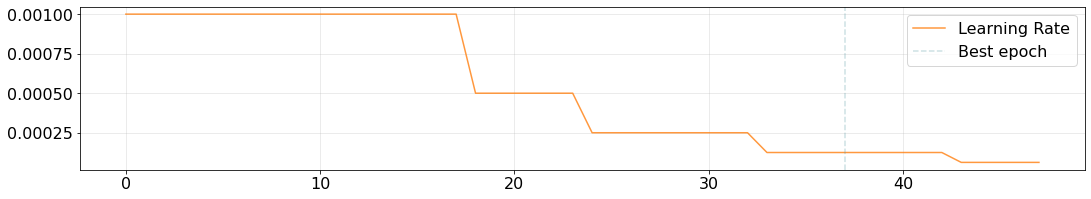

In [ ]:
# We plot the trend of the loss function, the accuracy on both training and valiation
# set and the trend of the learning rate

best_epoch = np.argmax(history['val_accuracy'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Categorical Crossentropy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(17,4))
plt.plot(history['accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation accuracy', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()